In [85]:
import matplotlib.pyplot as plt
import numpy as np

with open("input.txt",'r') as text:
    lines = text.readlines()

In [55]:
# part 1

i = 0
x = 1
strength = []

def check(line,i,x):
    val = 0
    if "addx" in line:
        val = int(line.split(" ")[-1].replace("\n",""))
        i += 1
    else:
        i += 1
    check_in(i,x)
    x += val
    return i, x

def check_in(i,x):
    if i in [20, 60, 100, 140, 180, 220]:
        #print(i,x,i*x)
        strength.append(i*x)

for line in lines:
    if "addx" in line:
        i += 1
        check_in(i,x)
    i,x = check(line, i, x)

print(sum(strength))

12520


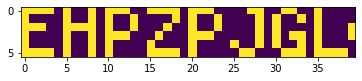

In [93]:
# part 2
i = 0
x = 1
vals = []

def sprite(x):
    sprite = np.zeros(40)
    x1 = np.clip(x-1,0,39)
    x2 = np.clip(x+1,0,39)
    sprite[x1] = 1
    sprite[x] = 1
    sprite[x2] = 1
    return sprite

def calc_val(sprite_pos,i,val):
    if i > 39:
        i = 0
        vals.append(val)
        val = []
    val.append(sprite_pos[i])
    return i,val

def check(line,i,x,val,sprite_pos):
    value = 0
    if "addx" in line:
        value = int(line.split(" ")[-1].replace("\n",""))
    i,val = calc_val(sprite_pos,i,val)
    i += 1
    x += value
    return i, x, val

val = []
sprite_pos = sprite(x)
for line in lines:
    if "addx" in line:
        i,val = calc_val(sprite_pos,i,val)
        i += 1
    i,x,val = check(line, i, x, val,sprite_pos)
    sprite_pos = sprite(x)
vals.append(val)

plt.imshow(np.array(vals))
